In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [45]:
train_data.info()
train_data.head()
train_data.isnull().sum()
#train_data.describe()
#train_data['Survived'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
test_data.info()
test_data.head()
test_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [47]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [48]:
test_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [49]:
train_data = pd.get_dummies(train_data, columns=['Sex','Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex','Embarked'])
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [50]:
train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

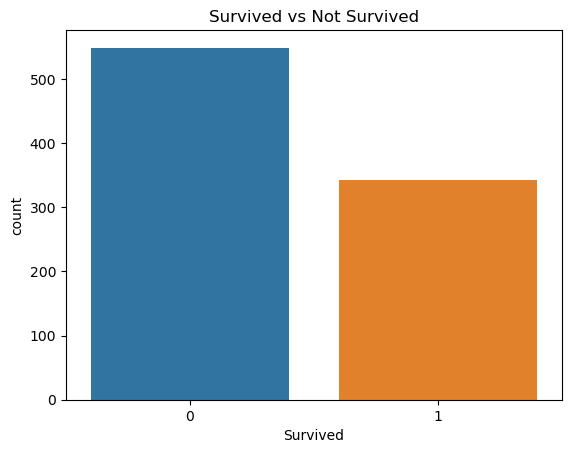

In [52]:
sns.countplot(x='Survived', data=train_data)
plt.title("Survived vs Not Survived")
plt.show()

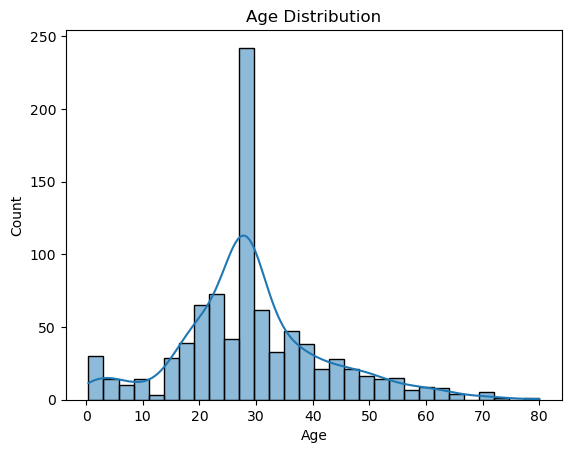

In [54]:
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

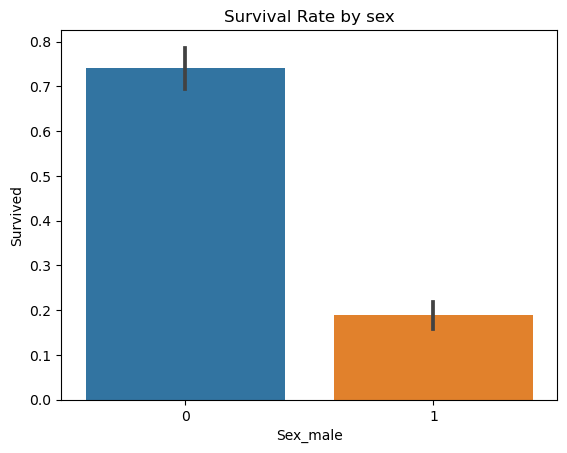

In [56]:
sns.barplot(x='Sex_male', y='Survived', data=train_data)
plt.title("Survival Rate by sex")
plt.show()

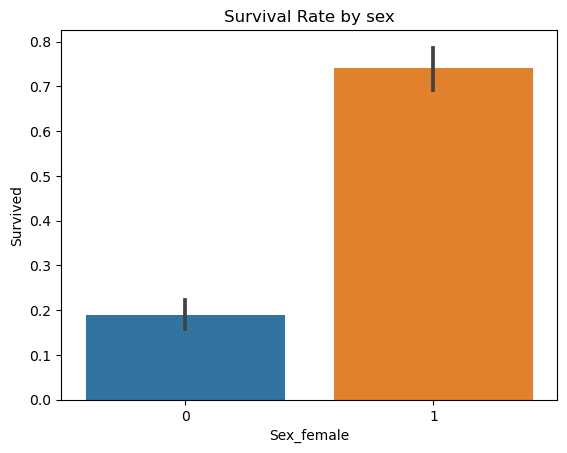

In [57]:
sns.barplot(x='Sex_female', y='Survived', data=train_data)
plt.title("Survival Rate by sex")
plt.show()

In [59]:
x = train_data.drop('Survived', axis=1)
y = train_data['Survived']

x_train, x_val, y_train, y_val = train_test_split(x, y, 
                                                  test_size=0.2, 
                                                  random_state=7)

In [61]:
clt = DecisionTreeClassifier(random_state=42)
clt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
y_pred = clt.predict(x_val)

In [72]:
accuracy = accuracy_score(y_val, y_pred)
print("accuracy rate:", accuracy)

print("confusion matrix:")
print(confusion_matrix(y_val, y_pred))

print("classification report:")
print(classification_report(y_val, y_pred))

accuracy rate: 0.7486033519553073
confusion matrix:
[[92 18]
 [27 42]]
classification report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       110
           1       0.70      0.61      0.65        69

    accuracy                           0.75       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.74      0.75      0.74       179

